In [1]:
import numpy as np
import pandas as pd


# Import data

In [2]:
transaction = pd.read_csv("transactions.csv")
cc_info = pd.read_csv("cc_info.csv")

In [3]:
transaction.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [4]:
cc_info.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


# Data processing

In [5]:
transaction["date"] = pd.to_datetime(transaction["date"])

In [6]:
transaction.dtypes

credit_card                           int64
date                         datetime64[ns]
transaction_dollar_amount           float64
Long                                float64
Lat                                 float64
dtype: object

In [7]:
transaction["year"] = transaction["date"].dt.year
transaction["month"] = transaction["date"].dt.month
transaction["day"] = transaction["date"].dt.day

In [8]:
transaction.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,year,month,day
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,2015,9,11
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,2015,10,24
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,2015,10,26
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,2015,10,22
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,2015,10,26


# Data explore

## credit card information

In [9]:
cc_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB


In [10]:
# check if there is any duplication
cc_info["credit_card"].duplicated().sum()

0

In [11]:
cc_info["credit_card_limit"].describe()

count      984.000000
mean     12321.138211
std       7398.449174
min       2000.000000
25%       7000.000000
50%      10000.000000
75%      16000.000000
max      55000.000000
Name: credit_card_limit, dtype: float64

## Transaction

In [12]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                294588 non-null  int64         
 1   date                       294588 non-null  datetime64[ns]
 2   transaction_dollar_amount  294588 non-null  float64       
 3   Long                       294588 non-null  float64       
 4   Lat                        294588 non-null  float64       
 5   year                       294588 non-null  int64         
 6   month                      294588 non-null  int64         
 7   day                        294588 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 18.0 MB


In [13]:
transaction["year"].unique()

array([2015], dtype=int64)

In [14]:
transaction["month"].unique()

array([ 9, 10,  8,  7], dtype=int64)

# Task 1

identify those users that in your dataset never went above the monthly credit card limit (calendar month).

In [15]:
# group transaction amount by ID and month
monthly_trasc_amount = transaction[["credit_card", "month", "transaction_dollar_amount"]].groupby(
    ["credit_card", "month"]).agg(np.sum)
monthly_trasc_amount.reset_index(inplace=True)

In [16]:
# merge cc_info to get the credit limit
monthly_trasc_amount = monthly_trasc_amount.merge(
    cc_info[["credit_card", "credit_card_limit"]],
    "left",
    "credit_card"
)

In [17]:
# calculate unused credit
monthly_trasc_amount["unused_credit"] = monthly_trasc_amount["credit_card_limit"] - monthly_trasc_amount["transaction_dollar_amount"]
monthly_trasc_amount

,credit_card,month,transaction_dollar_amount,credit_card_limit,unused_credit
0,1003715054175576,7,162.56,20000,19837.44
1,1003715054175576,8,8441.51,20000,11558.49
2,1003715054175576,9,11281.56,20000,8718.44
3,1003715054175576,10,8954.21,20000,11045.79
4,1013870087888817,7,281.43,15000,14718.57
...,...,...,...,...,...
3792,9986135779184360,10,11796.95,14000,2203.05
3793,9999757432802760,7,77.59,6000,5922.41
3794,9999757432802760,8,4408.83,6000,1591.17
3795,9999757432802760,9,6814.72,6000,-814.72


In [18]:
# define a function to reture credit state (o for not excess credit, 1 for excess credit)
def credit_status(x):
    if x >= 0:
        return 0
    else:
        return 1

In [19]:
# use apply to calculate credit_status of each user by month
monthly_trasc_amount["credit_status"] = monthly_trasc_amount["unused_credit"].apply(credit_status)
monthly_trasc_amount

,credit_card,month,transaction_dollar_amount,credit_card_limit,unused_credit,credit_status
0,1003715054175576,7,162.56,20000,19837.44,0
1,1003715054175576,8,8441.51,20000,11558.49,0
2,1003715054175576,9,11281.56,20000,8718.44,0
3,1003715054175576,10,8954.21,20000,11045.79,0
4,1013870087888817,7,281.43,15000,14718.57,0
...,...,...,...,...,...,...
3792,9986135779184360,10,11796.95,14000,2203.05,0
3793,9999757432802760,7,77.59,6000,5922.41,0
3794,9999757432802760,8,4408.83,6000,1591.17,0
3795,9999757432802760,9,6814.72,6000,-814.72,1


In [20]:
# group by credit_status to find the users whose credit_status are always 0
credit_status = monthly_trasc_amount[["credit_card", "credit_status"]].groupby(
    "credit_card").agg(np.sum)
not_excess_credit = credit_status[credit_status["credit_status"] == 0]
not_excess_credit

,credit_status
credit_card,
1003715054175576,0
1013870087888817,0
1023820165155391,0
1073931538936472,0
1077622576192810,0
...,...
9946917923319410,0
9958678964376192,0
9961694231875562,0


# Task 2

implement an algorithm that as soon as a user goes above his monthly limit, it triggers an alert so that the user can be notified about that.We assume here that at the beginning of the new month, user total money spent gets reset to zero (i.e. he pays the card fully at the end of each month). __Build a function that for each day, returns a list of users who went above their credit card monthly limit on that day.__

In [21]:
# calculate daily trasaction amounts
features = ["credit_card", "year", "month", "day", "transaction_dollar_amount"]
transaction_by_day = transaction[features].groupby(
    ["credit_card", "year", "month", "day"]
).agg(np.sum)

transaction_by_day.reset_index(inplace=True)
day_col = transaction_by_day["day"]
transaction_by_day

,credit_card,year,month,day,transaction_dollar_amount
0,1003715054175576,2015,7,31,162.56
1,1003715054175576,2015,8,1,373.58
2,1003715054175576,2015,8,2,217.17
3,1003715054175576,2015,8,3,241.72
4,1003715054175576,2015,8,4,167.15
...,...,...,...,...,...
74026,9999757432802760,2015,10,23,534.77
74027,9999757432802760,2015,10,24,233.97
74028,9999757432802760,2015,10,25,177.51
74029,9999757432802760,2015,10,27,146.37


In [22]:
# calculate monthly cumulative transaction amounts
transaction_by_day = transaction_by_day.groupby(
    ["credit_card", "year", "month"]
).expanding(min_periods=1).agg(np.sum)

In [23]:
transaction_by_day.reset_index(inplace=True)

In [24]:
# sort out data
transaction_by_day.reset_index(inplace=True)
transaction_by_day.drop(columns=["level_3"], inplace=True)
transaction_by_day["day"] = day_col
transaction_by_day

,index,credit_card,year,month,day,transaction_dollar_amount
0,0,1003715054175576,2015,7,31,162.56
1,1,1003715054175576,2015,8,1,373.58
2,2,1003715054175576,2015,8,2,590.75
3,3,1003715054175576,2015,8,3,832.47
4,4,1003715054175576,2015,8,4,999.62
...,...,...,...,...,...,...
74026,74026,9999757432802760,2015,10,23,6110.93
74027,74027,9999757432802760,2015,10,24,6344.90
74028,74028,9999757432802760,2015,10,25,6522.41
74029,74029,9999757432802760,2015,10,27,6668.78


In [25]:
# calculate unused credit
transaction_by_day = transaction_by_day.merge(
    cc_info[["credit_card", "credit_card_limit"]], "left", "credit_card")

transaction_by_day["unused_credit"] = transaction_by_day["credit_card_limit"] - transaction_by_day["transaction_dollar_amount"]

transaction_by_day

,index,credit_card,year,month,day,transaction_dollar_amount,credit_card_limit,unused_credit
0,0,1003715054175576,2015,7,31,162.56,20000,19837.44
1,1,1003715054175576,2015,8,1,373.58,20000,19626.42
2,2,1003715054175576,2015,8,2,590.75,20000,19409.25
3,3,1003715054175576,2015,8,3,832.47,20000,19167.53
4,4,1003715054175576,2015,8,4,999.62,20000,19000.38
...,...,...,...,...,...,...,...,...
74026,74026,9999757432802760,2015,10,23,6110.93,6000,-110.93
74027,74027,9999757432802760,2015,10,24,6344.90,6000,-344.90
74028,74028,9999757432802760,2015,10,25,6522.41,6000,-522.41
74029,74029,9999757432802760,2015,10,27,6668.78,6000,-668.78


In [26]:
def credit_status(x):
    if x >= 0:
        return 0
    else:
        return 1

In [27]:
# calculate credit status
transaction_by_day["credit_status"] = transaction_by_day["unused_credit"].apply(credit_status)
# filter excess credit data
transaction_by_day = transaction_by_day[transaction_by_day["credit_status"] > 0]

In [28]:
# group data to find the first day in each month that users' credit exceeds 
excess_credit = transaction_by_day.iloc[ :,1:5].groupby(["credit_card", "year", "month"]).agg(np.min)
excess_credit = excess_credit.reset_index()
excess_credit

,credit_card,year,month,day
0,1106824181265726,2015,8,28
1,1106824181265726,2015,9,22
2,1106824181265726,2015,10,27
3,1175962294549313,2015,8,28
4,1175962294549313,2015,9,30
...,...,...,...,...
221,9727202337611852,2015,8,31
222,9727202337611852,2015,10,30
223,9737219864179988,2015,8,31
224,9999757432802760,2015,9,29


# Task 3

implement an unsupervised algorithm that returns all transactions that seem unusual and are worth being investigated further

## Data precessing

In [29]:
transaction['hour'] = transaction['date'].dt.hour

In [30]:
transaction['week'] = transaction['date'].dt.weekday

## Data Overview

In [31]:
# count the number of trasaction of each ID
trasc_num = transaction.groupby("credit_card").agg(np.size).iloc[:,1]

In [32]:
trasc_num.sort_values(ascending=False)

credit_card
2239759218122779    667
3015736744626726    657
5059189477453448    655
4569281393242605    653
3824313030996787    653
                   ... 
4705966876787269      2
6400102930973570      2
2848482178783636      1
4954103748307036      1
4296246438604183      1
Name: transaction_dollar_amount, Length: 984, dtype: int64

In [33]:
trasc_num.describe()

count    984.000000
mean     299.378049
std      183.564451
min        1.000000
25%      136.750000
50%      284.500000
75%      459.250000
max      667.000000
Name: transaction_dollar_amount, dtype: float64

In [34]:
# find a user as a sample
user_id = 9986135779184360

In [35]:
# find all trasactions of a specific user
trasc_sub = transaction[transaction["credit_card"] == user_id]
trasc_sub

,credit_card,date,transaction_dollar_amount,Long,Lat,year,month,day,hour,week
293946,9986135779184360,2015-10-17 21:48:13,77.44,-80.227777,40.315688,2015,10,17,21,5
293947,9986135779184360,2015-07-31 20:26:35,25.19,-80.282506,40.218883,2015,7,31,20,4
293948,9986135779184360,2015-08-24 01:59:33,84.19,-80.205257,40.199180,2015,8,24,1,0
293949,9986135779184360,2015-10-05 22:06:46,47.88,-80.216260,40.247398,2015,10,5,22,0
293950,9986135779184360,2015-07-31 18:57:22,45.99,-80.182744,40.261912,2015,7,31,18,4
...,...,...,...,...,...,...,...,...,...,...
294460,9986135779184360,2015-09-06 17:57:07,85.25,-80.173245,40.224012,2015,9,6,17,6
294461,9986135779184360,2015-09-04 00:33:42,62.80,-80.178270,40.275668,2015,9,4,0,4
294462,9986135779184360,2015-09-06 01:01:36,62.26,-80.154832,40.179227,2015,9,6,1,6
294463,9986135779184360,2015-10-28 16:03:41,61.26,-80.300369,40.263677,2015,10,28,16,2


## Data Visulisation

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

### define function

In [37]:
def trasc_distrb(data):
    fig,ax=plt.subplots(1, 3)
    fig.set_figheight(3)
    fig.set_figwidth(12)

    ax[0].scatter(x="Long", y="Lat", data=data)

    ax1 = ax[1].twinx()
    ax[1].hist(data["Long"])
    ax1.scatter(data["Long"], data["transaction_dollar_amount"], color='orange')

    ax2 = ax[2].twinx()
    ax[2].hist(data["Lat"])
    ax2.scatter(data["Lat"], data["transaction_dollar_amount"], color='orange')
    
    fig,ax=plt.subplots(1, 4)
    fig.set_figheight(3)
    fig.set_figwidth(12)

    ax0 = ax[0].twinx()
    ax[0].hist(data["month"])
    ax0.scatter(data["month"], data["transaction_dollar_amount"], color='orange')

    ax1 = ax[1].twinx()
    ax[1].hist(data["day"])
    ax1.scatter(data["day"], data["transaction_dollar_amount"], color='orange')

    ax2 = ax[2].twinx()
    ax[2].hist(data["week"])
    ax2.scatter(data["week"], data["transaction_dollar_amount"], color='orange')

    ax3 = ax[3].twinx()
    ax[3].hist(data["hour"])
    ax3.scatter(data["hour"], data["transaction_dollar_amount"], color='orange')
    
    plt.figure(figsize=(12,3))
    amount = sns.lineplot(x="date", y="transaction_dollar_amount", data=data)

In [38]:
def trasc_distrb_color(data):
    fig,ax=plt.subplots(1, 3)
    fig.set_figheight(3)
    fig.set_figwidth(12)

    ax[0].scatter(x="Long", y="Lat", data=data)

    ax1 = ax[1].twinx()
    ax[1].hist(data["Long"])
    ax1.scatter(data["Long"], data["transaction_dollar_amount"], c=data["type"])

    ax2 = ax[2].twinx()
    ax[2].hist(data["Lat"])
    ax2.scatter(data["Lat"], data["transaction_dollar_amount"], c=data["type"])
    
    fig,ax=plt.subplots(1, 4)
    fig.set_figheight(3)
    fig.set_figwidth(12)

    ax0 = ax[0].twinx()
    ax[0].hist(data["month"])
    ax0.scatter(data["month"], data["transaction_dollar_amount"], c=data["type"])

    ax1 = ax[1].twinx()
    ax[1].hist(data["day"])
    ax1.scatter(data["day"], data["transaction_dollar_amount"], c=data["type"])

    ax2 = ax[2].twinx()
    ax[2].hist(data["week"])
    ax2.scatter(data["week"], data["transaction_dollar_amount"], c=data["type"])

    ax3 = ax[3].twinx()
    ax[3].hist(data["hour"])
    ax3.scatter(data["hour"], data["transaction_dollar_amount"], c=data["type"])
    
    plt.figure(figsize=(12,3))
    plt.scatter(x="date", y="transaction_dollar_amount",c=data["type"], data=data)

### show charts

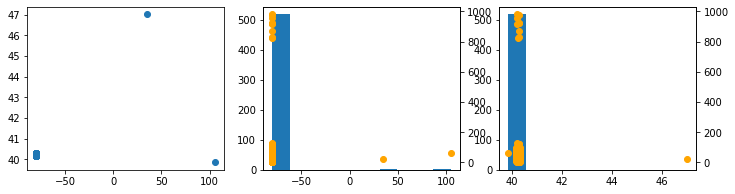

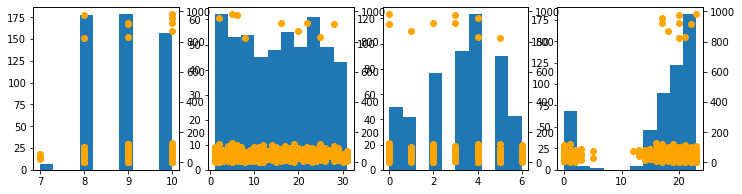

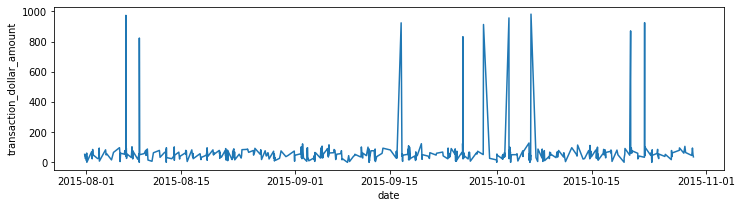

In [39]:
trasc_distrb(trasc_sub)

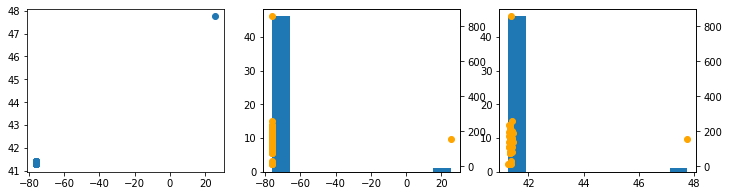

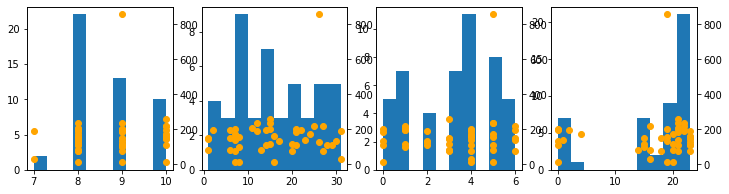

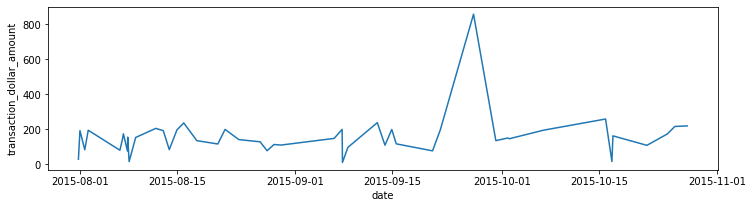

In [40]:
user_id = 1073931538936472
trasc_sub = transaction[transaction["credit_card"] == user_id]
trasc_distrb(trasc_sub)

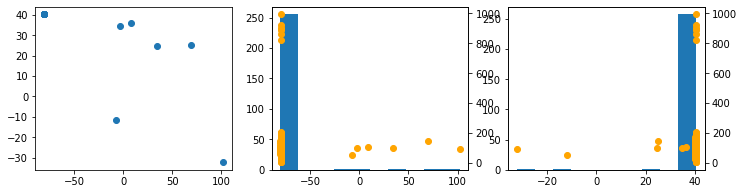

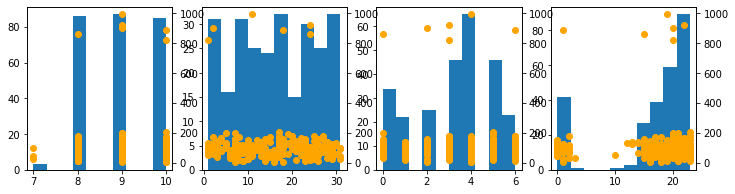

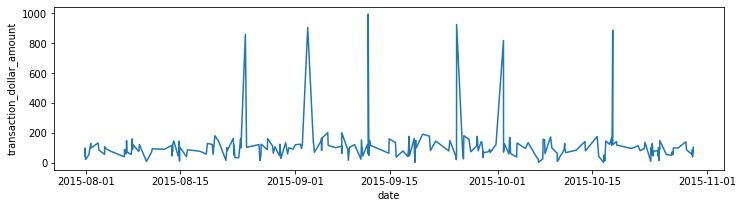

In [41]:
user_id = 1003715054175576
trasc_sub = transaction[transaction["credit_card"] == user_id]
trasc_distrb(trasc_sub)

### Summary from Visualisation

Here is summary about the above charts:
- the locations of a user to make trasactions centralised. Locations may be a feature to find unusual trasactions.
- the transations distribute evenly among month, day and weekday. They may not be  good features, but we could have try. However, the trsaction hour may be a good features as transactions concentrated in certain hours.
- transations amount can be a feature as most amounts fall into a certain range and only a few are outliers.

## Build Model

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

### Model_1 (K-Means)

In [43]:
data_cluster = trasc_sub.iloc[:,2:9]

#### K-means (n=2)

In [44]:
kms = KMeans(n_clusters=2)
kms.fit(data_cluster)

KMeans(n_clusters=2)

In [45]:
trasc_sub["type"] = kms.labels_

C:\Users\CT\AppData\Local\Temp/ipykernel_14568/1675818882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trasc_sub["type"] = kms.labels_


In [46]:
trasc_sub.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,year,month,day,hour,week,type
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,2015,9,11,0,4,0
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,2015,10,24,22,5,0
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,2015,10,26,18,0,0
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,2015,10,22,19,3,0
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,2015,10,26,20,0,0


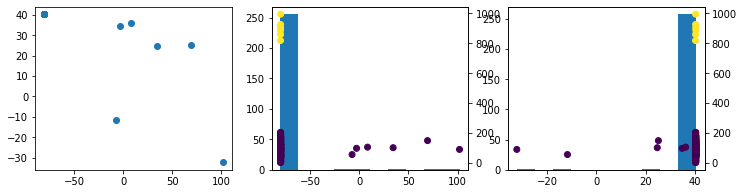

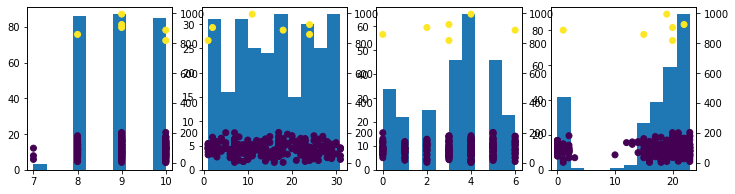

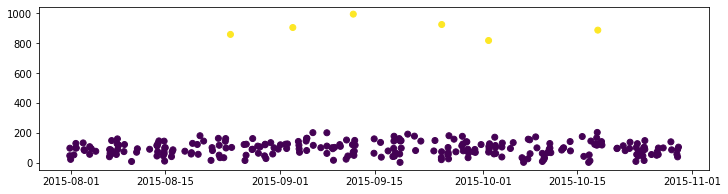

In [47]:
trasc_distrb_color(trasc_sub)

from the plots we can see only large amount transactions are identifed. Because amount weight are higher than other variables. Next step, we can try more clusters.

#### K-means (n>2)

C:\Users\CT\AppData\Local\Temp/ipykernel_14568/1360967018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trasc_sub["type"] = kms.labels_


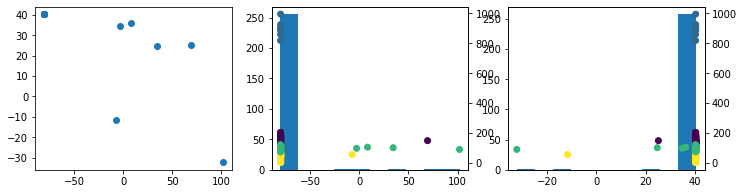

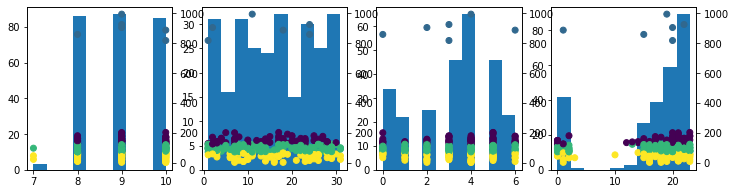

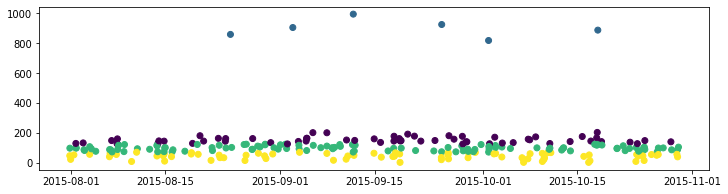

In [48]:
kms = KMeans(n_clusters=4)
kms.fit(data_cluster)
trasc_sub["type"] = kms.labels_
trasc_distrb_color(trasc_sub)

It doesn't work well, because amounts' weight are too much high compared to other features.

#### K-means (scale)

In [49]:
# select usual transactions after (K-means(n=2))
data_cluster_no_amount = trasc_sub[trasc_sub["type"] == 0].iloc[:, 3:10]

In [50]:
# scale data
data_cluster_scale = StandardScaler().fit_transform(data_cluster_no_amount)
data_cluster_scale = pd.DataFrame(data_cluster_scale)
data_cluster_scale.columns = data_cluster_no_amount.columns
data_cluster_scale

,Long,Lat,year,month,day,hour,week
0,-0.127237,0.152392,0.0,1.296782,0.826144,0.364063,-0.285523
1,7.745947,-7.743768,0.0,-0.043959,0.349597,0.631628,0.276313
2,-0.132020,0.104228,0.0,1.296782,-1.199178,-0.572412,-1.971032
3,-0.132772,0.146628,0.0,-0.043959,0.349597,0.096499,0.276313
4,-0.128240,0.158914,0.0,-0.043959,0.468734,0.631628,0.838149
...,...,...,...,...,...,...,...
56,-0.128469,0.084096,0.0,-1.384699,0.945280,0.765410,1.399985
57,-0.126841,0.132470,0.0,-0.043959,-0.365222,-2.177799,0.838149
58,-0.131395,0.141312,0.0,-0.043959,-1.556587,-2.044017,-0.847360
59,-0.132893,0.103340,0.0,-1.384699,-0.126949,-2.177799,0.276313


C:\Users\CT\AppData\Local\Temp/ipykernel_14568/1434576161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trasc_sub["type"][trasc_sub["type"] == 0] = kms.labels_
C:\Users\CT\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


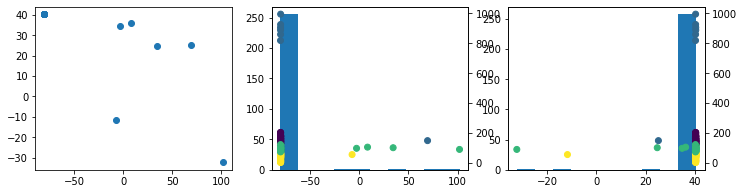

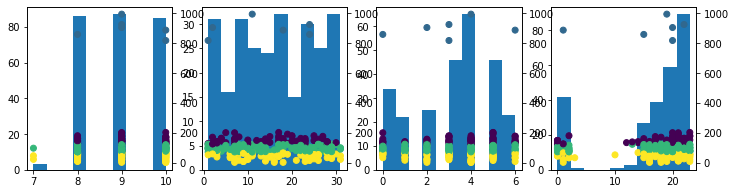

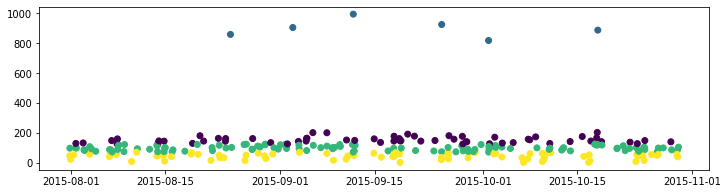

In [51]:
kms = KMeans(n_clusters=2)
kms.fit(data_cluster_scale)
trasc_sub["type"][trasc_sub["type"] == 0] = kms.labels_
trasc_distrb_color(trasc_sub)

Obviously it is the best model among these three. It identify large amount and anomaly location transactions.

### Model_2（Detect Feature One by One）

In [52]:
data_cluster = trasc_sub.iloc[:,[2,3,4,8]]
data_cluster["X"] = 0
data_cluster

C:\Users\CT\AppData\Local\Temp/ipykernel_14568/2624168985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster["X"] = 0


,transaction_dollar_amount,Long,Lat,hour,X
0,43.78,-80.174132,40.267370,0,0
1,103.15,-80.194240,40.180114,22,0
2,48.55,-80.211033,40.313004,18,0
3,136.18,-80.174138,40.290895,19,0
4,71.82,-80.238720,40.166719,20,0
...,...,...,...,...,...
256,57.50,-80.241273,40.193112,15,0
257,0.97,-80.196676,40.225513,1,0
258,71.02,-80.283377,40.188913,2,0
259,103.11,8.360145,36.188123,23,0


In [53]:
trasc_sub[trasc_sub["type"] != 0]

,credit_card,date,transaction_dollar_amount,Long,Lat,year,month,day,hour,week,type
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,2015,9,11,0,4,3
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,2015,10,24,22,5,2
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,2015,10,26,18,0,3
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,2015,10,26,20,0,2
5,1003715054175576,2015-10-17 21:28:57,121.60,-80.243565,40.260887,2015,10,17,21,5,2
...,...,...,...,...,...,...,...,...,...,...,...
256,1003715054175576,2015-10-02 15:55:48,57.50,-80.241273,40.193112,2015,10,2,15,4,3
257,1003715054175576,2015-10-07 01:16:12,0.97,-80.196676,40.225513,2015,10,7,1,2,3
258,1003715054175576,2015-08-07 02:28:31,71.02,-80.283377,40.188913,2015,8,7,2,4,2
259,1003715054175576,2015-10-29 23:47:59,103.11,8.360145,36.188123,2015,10,29,23,3,2


C:\Users\CT\AppData\Local\Temp/ipykernel_14568/1715383960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trasc_sub["type"] = 0
C:\Users\CT\AppData\Local\Temp/ipykernel_14568/1715383960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trasc_sub["type"] = trasc_sub["type"] + kms.labels_
C:\Users\CT\AppData\Local\Temp/ipykernel_14568/1715383960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

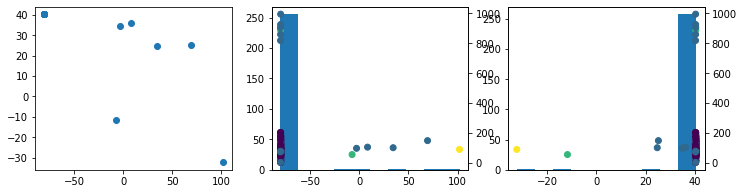

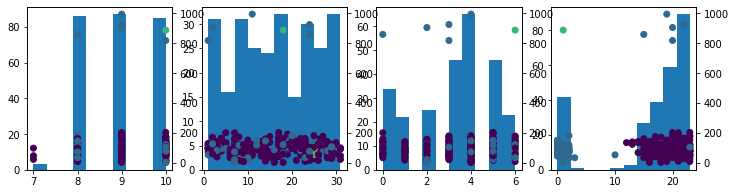

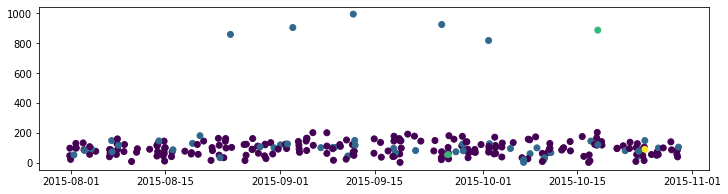

In [54]:
trasc_sub["type"] = 0

for col in data_cluster.columns:
    kms = KMeans(n_clusters=2)
    kms.fit(data_cluster[[col,"X"]])
    trasc_sub["type"] = trasc_sub["type"] + kms.labels_

trasc_distrb_color(trasc_sub)

### Model_3 (Isolation Forest)

In [56]:
trasc_sub.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,year,month,day,hour,week,type
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,2015,9,11,0,4,1
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,2015,10,24,22,5,0
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,2015,10,26,18,0,0
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,2015,10,22,19,3,0
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,2015,10,26,20,0,0


The features can be used to detect anomaly transactions is "Long", "Lat", "amount" and hour.

In [62]:
data_IsoForest = trasc_sub[["Long", "Lat", "hour", "transaction_dollar_amount"]]
data_IsoForest

,Long,Lat,hour,transaction_dollar_amount
0,-80.174132,40.267370,0,43.78
1,-80.194240,40.180114,22,103.15
2,-80.211033,40.313004,18,48.55
3,-80.174138,40.290895,19,136.18
4,-80.238720,40.166719,20,71.82
...,...,...,...,...
256,-80.241273,40.193112,15,57.50
257,-80.196676,40.225513,1,0.97
258,-80.283377,40.188913,2,71.02
259,8.360145,36.188123,23,103.11


In [64]:
# scale data
col_names = data_IsoForest.columns
data_IsoForest = pd.DataFrame(StandardScaler().fit_transform(data_IsoForest))
data_IsoForest.columns = col_names
round(data_IsoForest.describe())

,Long,Lat,hour,transaction_dollar_amount
count,261.0,261.0,261.0,261.0
mean,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0
min,-0.0,-13.0,-2.0,-1.0
25%,-0.0,0.0,-0.0,-0.0
50%,-0.0,0.0,0.0,-0.0
75%,-0.0,0.0,1.0,0.0
max,10.0,0.0,1.0,7.0


In [99]:
# use PCA to visualize data
pca = PCA(n_components=2, random_state=42)
trasc_pac = pca.fit_transform(data_IsoForest)

In [100]:
# variance explained by the first two components
sum(pca.explained_variance_ratio_)

0.7015938776140843

In [109]:
# check the variance ratio of the first two components
pca.explained_variance_ratio_

array([0.45164065, 0.24995323])

In [112]:
# check the feature importance in each component
pca.components_

array([[ 0.70129724, -0.70449408, -0.10494936, -0.02925585],
       [ 0.05100208, -0.02225143,  0.21859858,  0.97422704]])

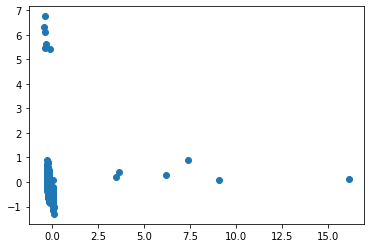

In [119]:
plt.scatter(trasc_pac[:, 0], trasc_pac[:, 1])

In [121]:
# build Isolation Forest model
forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, 
                         max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42)

In [124]:
# get the results
label = forest.fit_predict(data_IsoForest)
trasc_sub["type"] = label
trasc_sub

C:\Users\CT\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\CT\AppData\Local\Temp/ipykernel_14568/2246536737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trasc_sub["type"] = label


,credit_card,date,transaction_dollar_amount,Long,Lat,year,month,day,hour,week,type
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,2015,9,11,0,4,1
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,2015,10,24,22,5,1
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,2015,10,26,18,0,1
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,2015,10,22,19,3,1
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,2015,10,26,20,0,1
...,...,...,...,...,...,...,...,...,...,...,...
256,1003715054175576,2015-10-02 15:55:48,57.50,-80.241273,40.193112,2015,10,2,15,4,1
257,1003715054175576,2015-10-07 01:16:12,0.97,-80.196676,40.225513,2015,10,7,1,2,-1
258,1003715054175576,2015-08-07 02:28:31,71.02,-80.283377,40.188913,2015,8,7,2,4,-1
259,1003715054175576,2015-10-29 23:47:59,103.11,8.360145,36.188123,2015,10,29,23,3,-1


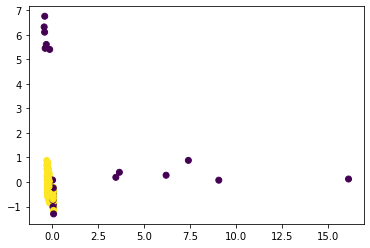

In [125]:
plt.scatter(trasc_pac[:, 0], trasc_pac[:, 1], c=label)

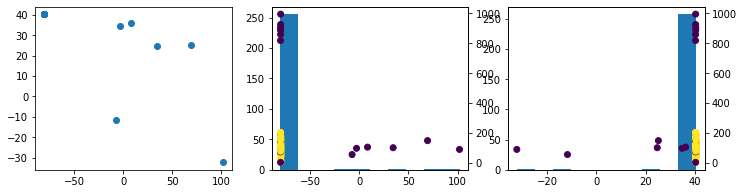

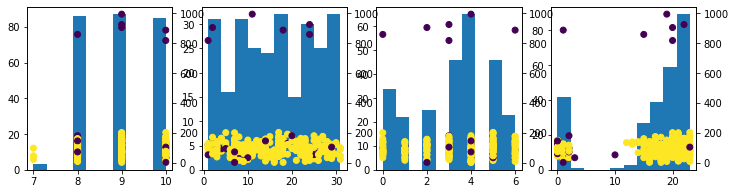

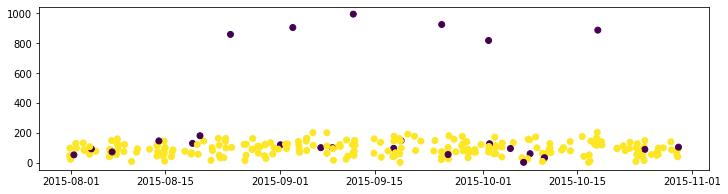

In [126]:
trasc_distrb_color(trasc_sub)

In [132]:
trasc_sub[(trasc_sub["type"] == -1) & 
          (trasc_sub["Long"] <= -79) & 
          (trasc_sub["transaction_dollar_amount"] <= 200)]

,credit_card,date,transaction_dollar_amount,Long,Lat,year,month,day,hour,week,type
50,1003715054175576,2015-09-01 00:50:44,118.84,-80.129378,40.264269,2015,9,1,0,1,-1
55,1003715054175576,2015-10-08 00:14:22,59.01,-80.162982,40.304409,2015,10,8,0,3,-1
72,1003715054175576,2015-08-19 00:30:15,128.31,-80.298764,40.246244,2015,8,19,0,2,-1
77,1003715054175576,2015-08-04 00:50:23,91.79,-80.289345,40.289285,2015,8,4,0,1,-1
106,1003715054175576,2015-10-10 02:49:43,31.16,-80.131308,40.230124,2015,10,10,2,5,-1
124,1003715054175576,2015-08-01 10:48:03,51.27,-80.176899,40.313324,2015,8,1,10,5,-1
133,1003715054175576,2015-09-07 00:29:10,99.45,-80.274851,40.191620,2015,9,7,0,0,-1
140,1003715054175576,2015-10-02 00:08:06,125.72,-80.245737,40.325918,2015,10,2,0,4,-1
171,1003715054175576,2015-10-05 02:25:45,93.97,-80.187619,40.165184,2015,10,5,2,0,-1
190,1003715054175576,2015-08-20 02:57:18,179.68,-80.157970,40.240962,2015,8,20,2,3,-1


In [133]:
trasc_sub[(trasc_sub["hour"] == 0)]

,credit_card,date,transaction_dollar_amount,Long,Lat,year,month,day,hour,week,type
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,2015,9,11,0,4,1
19,1003715054175576,2015-10-24 00:41:06,43.24,-80.183244,40.256479,2015,10,24,0,5,1
23,1003715054175576,2015-10-27 00:18:05,97.19,-80.202319,40.303652,2015,10,27,0,1,1
37,1003715054175576,2015-10-17 00:20:10,143.97,-80.172677,40.242183,2015,10,17,0,5,1
50,1003715054175576,2015-09-01 00:50:44,118.84,-80.129378,40.264269,2015,9,1,0,1,-1
55,1003715054175576,2015-10-08 00:14:22,59.01,-80.162982,40.304409,2015,10,8,0,3,-1
63,1003715054175576,2015-08-07 00:55:52,147.20,-80.250841,40.241924,2015,8,7,0,4,1
72,1003715054175576,2015-08-19 00:30:15,128.31,-80.298764,40.246244,2015,8,19,0,2,-1
77,1003715054175576,2015-08-04 00:50:23,91.79,-80.289345,40.289285,2015,8,4,0,1,-1
78,1003715054175576,2015-09-27 00:30:40,71.65,-80.237074,40.241965,2015,9,27,0,6,1


Try to use PCA to find the outliers

In [134]:
# get the results
label = forest.fit_predict(trasc_pac)
trasc_sub["type"] = label
trasc_sub

C:\Users\CT\AppData\Local\Temp/ipykernel_14568/4250717668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trasc_sub["type"] = label


,credit_card,date,transaction_dollar_amount,Long,Lat,year,month,day,hour,week,type
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,2015,9,11,0,4,-1
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,2015,10,24,22,5,1
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,2015,10,26,18,0,1
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,2015,10,22,19,3,1
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,2015,10,26,20,0,1
...,...,...,...,...,...,...,...,...,...,...,...
256,1003715054175576,2015-10-02 15:55:48,57.50,-80.241273,40.193112,2015,10,2,15,4,1
257,1003715054175576,2015-10-07 01:16:12,0.97,-80.196676,40.225513,2015,10,7,1,2,-1
258,1003715054175576,2015-08-07 02:28:31,71.02,-80.283377,40.188913,2015,8,7,2,4,1
259,1003715054175576,2015-10-29 23:47:59,103.11,8.360145,36.188123,2015,10,29,23,3,-1


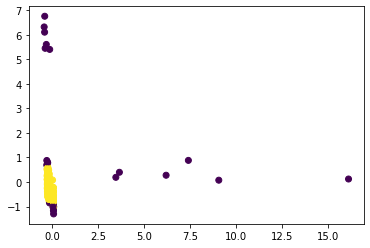

In [136]:
plt.scatter(trasc_pac[:, 0], trasc_pac[:, 1], c=label)

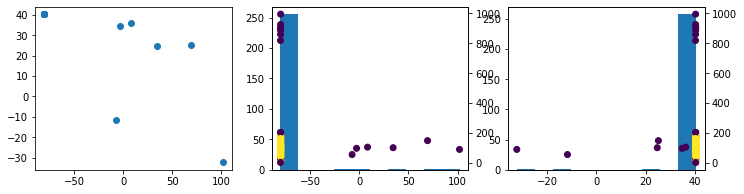

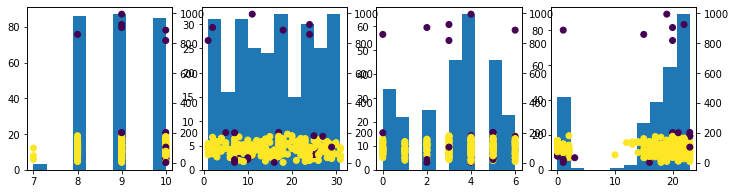

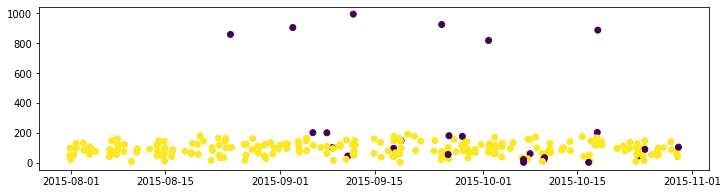

In [135]:
trasc_distrb_color(trasc_sub)